### Import packages

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans

### Create Graph

number of nodes: 30
number of edges: 122


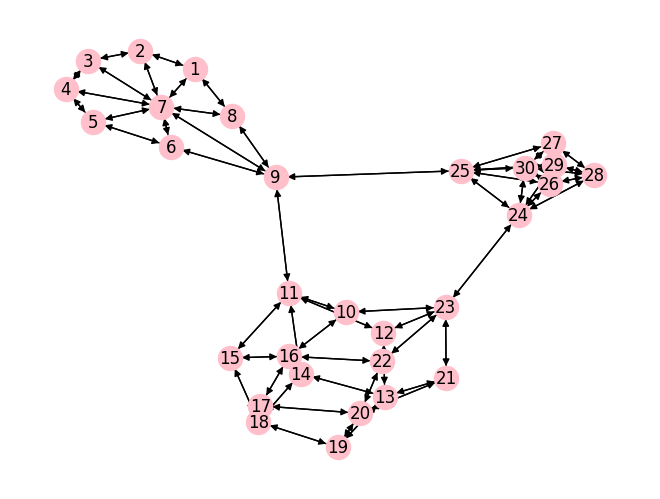

In [101]:
edges = [(1, 2), (1, 7), (1, 8), 
        (2, 1), (2, 7), (2, 3), 
        (3, 2), (3, 7), (3, 4), 
        (4, 3), (4, 7), (4, 5),
        (5, 4), (5, 7), (5, 6), 
        (6, 5), (6, 7), (6, 9), 
        (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 8), (7, 9), 
        (8, 1), (8, 7), (8, 9), 
        (9, 6), (9, 7), (9, 8),(9, 11), (9, 25),
        (10, 11), (10, 16), (10, 23), 
        (11, 9),  (11, 10), (11, 12), (11, 14), (11, 15), 
        (12, 11), (12, 13), (12, 23), 
        (13, 12), (13, 14), (13, 19),(13, 21), 
        (14, 11), (14, 13), (14, 18), 
        (15, 11), (15, 18), (15, 16), 
        (16, 10), (16, 15), (16, 17), (16, 22), 
        (17, 16), (17, 18), (17, 20), 
        (18, 14), (18, 15), (18, 17), (18, 19), 
        (19, 13), (19, 18), (19, 20), 
        (20, 17), (20, 19), (20, 21), (20, 22), 
        (21, 13), (21, 20), (21, 23), 
        (22, 16), (22, 20), (22, 23), 
        (23, 10), (23, 12), (23, 21), (23, 22), (23, 24), 
        (24, 23), (24, 25), (24, 26), (24, 28), (24, 29), (24, 30), 
        (25, 9) , (25, 24), (25, 26), (25, 27), (25, 29), (25, 30), 
        (26, 24), (26, 25), (26, 27), (26, 28), (26, 30), 
        (27, 25), (27, 26), (27, 28), (27, 29), (27, 30), 
        (28, 24), (28, 26), (28, 27), (28, 29), (28, 30), 
        (29, 24), (29, 25), (29, 27), (29, 28), (29, 30), 
        (30, 24), (30, 25), (30, 26), (30, 27), (30, 28), (30, 29),  
    ]
nodes = list(range(1, 31)) #Создание списка 30 nodes

G_dir = nx.DiGraph()
G = nx.Graph(G_dir)

G_dir.add_nodes_from(nodes)
G_dir.add_edges_from(edges)

num_nodes = G_dir.number_of_nodes()
print('number of nodes: ' + str(num_nodes))
num_edges = G_dir.number_of_edges()
print('number of edges: ' + str(num_edges))

nx.draw(G_dir, with_labels='True', node_color='pink')
plt.show()

### Degree centrality

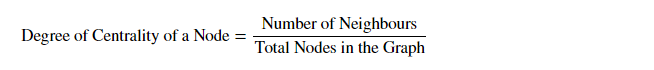

In [102]:
G = nx.Graph(G_dir)
deg_cen = {}
graphs=[G]
for g in graphs:
    deg_cen[g] = nx.degree_centrality(g)
    
num_nodes = graphs[0].number_of_nodes()
print('number of nodes: ' + str(num_nodes))
list_nodes=list(graphs[0].nodes)
print(list_nodes)
num_neighbors = graphs[0].degree(list_nodes[8])
print('degree of node', list_nodes[8], 'is ', num_neighbors )
print('Degree of Centrality:', round(num_neighbors/(num_nodes-1),3))
deg_cen



number of nodes: 30
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
degree of node 9 is  5
Degree of Centrality: 0.172


{<networkx.classes.graph.Graph at 0x21216c33fa0>: {1: 0.10344827586206896,
  2: 0.10344827586206896,
  3: 0.10344827586206896,
  4: 0.10344827586206896,
  5: 0.10344827586206896,
  6: 0.10344827586206896,
  7: 0.27586206896551724,
  8: 0.10344827586206896,
  9: 0.1724137931034483,
  10: 0.10344827586206896,
  11: 0.1724137931034483,
  12: 0.10344827586206896,
  13: 0.13793103448275862,
  14: 0.10344827586206896,
  15: 0.10344827586206896,
  16: 0.13793103448275862,
  17: 0.10344827586206896,
  18: 0.13793103448275862,
  19: 0.10344827586206896,
  20: 0.13793103448275862,
  21: 0.10344827586206896,
  22: 0.10344827586206896,
  23: 0.1724137931034483,
  24: 0.20689655172413793,
  25: 0.20689655172413793,
  26: 0.1724137931034483,
  27: 0.1724137931034483,
  28: 0.1724137931034483,
  29: 0.1724137931034483,
  30: 0.20689655172413793}}

### Between centrality
This metric determines which nodes in the network act as "bridges" between other nodes. This is achieved by first identifying all the shortest paths and then counting how many times each node hits one of them.

---

Tính sự ảnh hưởng của
một node đối với sự lan truyền thông tin trong mạng. Một node có
betweenness centrality càng lớn thì nó có vai trò quan trọng trong mạng xã
hội bởi có thể nó là cầu nối liên kết giữa 2 nhóm với nhau và nếu nó bị mất
thì việc trao đổi thông tin giữa hai nhóm sẽ không thể thực hiện được.

In [103]:
betw_cen = {}
for g in graphs:
    betw_cen[g] = nx.betweenness_centrality(g)

node_main = 23
node_compar = 11

paths= nx.all_pairs_shortest_path(graphs[0])
path_5_1=nx.all_shortest_paths(graphs[0],node_main,node_compar)
for p in paths:
    if p[0]==5:
        print(p)
        print('-'*50)

 
for p in path_5_1:
    print(p)

(5, {5: [5], 4: [5, 4], 7: [5, 7], 6: [5, 6], 3: [5, 4, 3], 1: [5, 7, 1], 2: [5, 7, 2], 8: [5, 7, 8], 9: [5, 7, 9], 11: [5, 7, 9, 11], 25: [5, 7, 9, 25], 10: [5, 7, 9, 11, 10], 12: [5, 7, 9, 11, 12], 14: [5, 7, 9, 11, 14], 15: [5, 7, 9, 11, 15], 24: [5, 7, 9, 25, 24], 26: [5, 7, 9, 25, 26], 27: [5, 7, 9, 25, 27], 29: [5, 7, 9, 25, 29], 30: [5, 7, 9, 25, 30], 16: [5, 7, 9, 11, 10, 16], 23: [5, 7, 9, 11, 10, 23], 13: [5, 7, 9, 11, 12, 13], 18: [5, 7, 9, 11, 14, 18], 28: [5, 7, 9, 25, 24, 28], 17: [5, 7, 9, 11, 10, 16, 17], 22: [5, 7, 9, 11, 10, 16, 22], 21: [5, 7, 9, 11, 10, 23, 21], 19: [5, 7, 9, 11, 12, 13, 19], 20: [5, 7, 9, 11, 10, 16, 17, 20]})
--------------------------------------------------
[23, 10, 11]
[23, 12, 11]


### Tính gần gũi trung tâm

Độ gần trung tâm của bất kỳ nút nào trong biểu đồ (giả sử v) có thể được tính bằng cách tìm khoảng cách trung bình của đường đi ngắn nhất đến v trên tất cả n-1 nút có thể truy cập và sau đó lấy nghịch đảo.
Độ gần gũi của mỗi node với các nút khác trong mạng. Nếu một nút có độ gần gũi càng thấp thì để giao tiếp với các nút khác nó muốn thì phải đi qua rất nhiều nút khác trong mạng.

---

### Closeness Centrality
The closeness to the center of any node in the graph (say v) can be calculated by finding the average distance of the shortest path to v over all n-1 reachable nodes and then taking inverse.
How close each node is to other nodes in the network. If a node has a lower degree of closeness, to communicate with other nodes it must go through many other nodes in the network.

In [104]:
clos_cen = {}
for g in graphs:
    clos_cen[g] = nx.closeness_centrality(g)
#print(clos_cen)

s = 0
node_clos = 6

for node in list_nodes:
    if nodes!=node_clos:
        shortest_path_length =  nx.shortest_path_length(graphs[0],node_clos,node)
        s+=shortest_path_length
print('The closeness centrality distance of node', node_clos, 'is ' ,(len(list_nodes)-1)/s)

The closeness centrality distance of node 6 is  0.32222222222222224


### Tính trung tâm của vectơ riêng
Tính trung tâm của Eigenvector tính toán tính trung tâm của một nút bằng cách sử dụng tính trung tâm của các nút lân cận. Đối với nút i, tập trung của vectơ riêng là A' x X = lambda x X, trong đó A' được định nghĩa là ma trận kề của đồ thị G có giá trị riêng lambda.
Độ đo tương tự như bậc, tuy nhiên thay vì đếm số lượng liên kết đến node đó thì nó quan tâm đến bậc của node mà liên kết với nó. Trong một mạng, khi 2 node có cùng bậc thì đại lượng này sẽ cho biết node nào liên kết với các node quan trọng hơn ở trong mạng.

---- 
### Calculate the centrality of eigenvectors
Eigenvector centrality calculates the centrality of a node using the centrality of neighboring nodes. For node i, the concentration of eigenvectors is A' x X = lambda x

In [105]:
eig_cen = {}
for g in graphs:
    eig_cen[g] = {node: np.round(value, 3) for node, value in nx.eigenvector_centrality(g).items()}
eig_cen

{<networkx.classes.graph.Graph at 0x21216c33fa0>: {1: 0.018,
  2: 0.015,
  3: 0.014,
  4: 0.015,
  5: 0.018,
  6: 0.031,
  7: 0.046,
  8: 0.031,
  9: 0.099,
  10: 0.026,
  11: 0.032,
  12: 0.026,
  13: 0.012,
  14: 0.009,
  15: 0.009,
  16: 0.012,
  17: 0.005,
  18: 0.006,
  19: 0.005,
  20: 0.01,
  21: 0.021,
  22: 0.021,
  23: 0.09,
  24: 0.375,
  25: 0.377,
  26: 0.36,
  27: 0.358,
  28: 0.358,
  29: 0.36,
  30: 0.418}}

### Hiển thị các nút quan trọng trên biểu đồ

In [106]:
for ix, g in enumerate(graphs):
    temp_dict = {}
    for w in sorted(deg_cen[g], key=deg_cen[g].get, reverse=True):
            temp_dict[w] = deg_cen[g][w]
    print('Sorted Importance of nodes in terms of deg_cen for Graph {} is {}'.format(ix+1, list(temp_dict.keys())[:5]))
print()

Sorted Importance of nodes in terms of deg_cen for Graph 1 is [7, 24, 25, 30, 9]



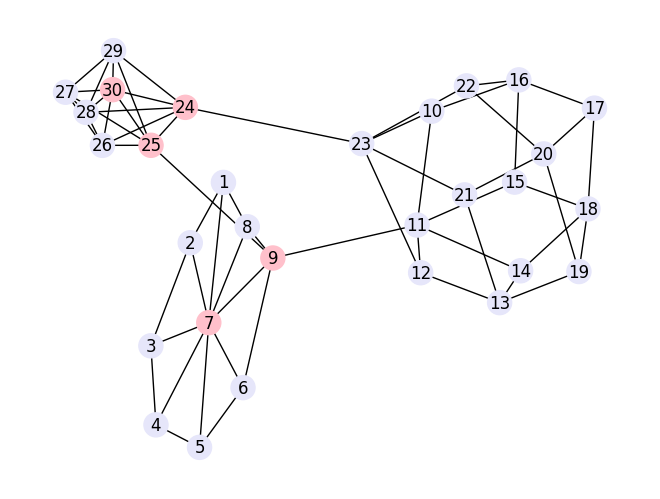

In [107]:
graph2 = G
color = []
for node in graph2:
    if (node == 7 or node == 24 or node == 25 or node == 30 or node == 9):
        color.append('pink')
    else:
        color.append('lavender')
 
nx.draw_spring(graph2,node_color=color,with_labels=True)

# Phân cụm quang phổ (Spectral clustering)
Phân cụm quang phổ
Thuật toán phân cụm quang phổ được sử dụng để chia đồ thị thành K nhóm dựa trên khả năng kết nối của chúng. Các bước phân cụm quang phổ bao gồm:

1) Tiền xử lý: xây dựng ma trận Laplace của đồ thị.
2) Sự phân hủy: Tính các giá trị riêng và vectơ riêng của ma trận Laplace, sau đó chúng ta cần ánh xạ từng điểm tới một biểu diễn có chiều thấp hơn. Laplace là sự khác biệt giữa ma trận kề và ma trận đường chéo. L = D - A.
3) Thuật toán K-Means: Tạo các nhóm cụm sử dụng dữ liệu trên.
---------
Spectral clustering
A spectral clustering algorithm is used to divide graphs into K groups based on their connectivity. Spectral clustering steps include:

1) Pre-processing: construction of the Laplace matrix of the graph.
2) Decomposition: Compute the eigenvalues and eigenvectors of the Laplace matrix, then we need to map each point to a lower dimensional representation. Laplace is the difference between an adjacency matrix and a diagonal matrix. L = D - A.
3) K-Means Algorithm: Create groups of clusters using the above data.

### Preliminary processing

Now we need to find matrix Laplacian 

In [108]:
G_p1=graphs[0]
A=nx.adjacency_matrix(G_p1)

print('— — — — — — — — — -ADJACENCY MATRIX — — — — — — — — — — — -')
print(A.todense())
print('-'*50)
print(' — — — — — — — — — -DIAGONAL MATRIX = DEGREE OF EACH NODE — — — — — — — — — — — -')
print(G_p1.degree)

print('-'*50)
L = nx.laplacian_matrix(G_p1).astype(float)
print(' — — — — — — — — — -LAPLACIAN MATRIX — — — — — — — — — — — -')
print(L.todense())



— — — — — — — — — -ADJACENCY MATRIX — — — — — — — — — — — -
[[0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 

### Sự phân hủy (Decomposition)

In [109]:
import scipy as sp 

l,v = sp.sparse.linalg.eigsh(L, k = 6, which='SM')
print('eigenvalue: ', np.round(l,5))
print('-'*50)
print('eigenvectors: ', np.round(v,5))



eigenvalue:  [0.      0.15084 0.25965 1.43845 1.52767 1.58579]
--------------------------------------------------
eigenvectors:  [[ 0.18257  0.27731  0.1108   0.       0.0078  -0.5    ]
 [ 0.18257  0.29316  0.12259  0.       0.1177  -0.35355]
 [ 0.18257  0.29728  0.12574 -0.       0.16215 -0.     ]
 [ 0.18257  0.29316  0.12259 -0.       0.1177   0.35355]
 [ 0.18257  0.27731  0.1108  -0.       0.0078   0.5    ]
 [ 0.18257  0.23628  0.08165  0.      -0.10955  0.35355]
 [ 0.18257  0.26067  0.09939  0.       0.00334 -0.     ]
 [ 0.18257  0.23628  0.08165  0.      -0.10955 -0.35355]
 [ 0.18257  0.13523  0.01354  0.      -0.17244  0.     ]
 [ 0.18257 -0.14297  0.07544 -0.27867 -0.20888  0.     ]
 [ 0.18257 -0.09684  0.08636 -0.      -0.36041  0.     ]
 [ 0.18257 -0.14297  0.07544  0.27867 -0.20888  0.     ]
 [ 0.18257 -0.17444  0.11206  0.43516 -0.01395  0.     ]
 [ 0.18257 -0.15944  0.12247  0.27867 -0.33063 -0.     ]
 [ 0.18257 -0.15944  0.12247 -0.27867 -0.33063 -0.     ]
 [ 0.18257 -0.17

### Phân cụm (clustering)

[[ 3.00000000e-16  4.05646058e-02  2.72663783e-02  2.00000000e-15
   8.12268717e-03 -6.38071187e-01]
 [ 3.00000000e-16  4.05646058e-02  2.72663783e-02 -1.10000000e-15
   8.12268717e-03  6.38071187e-01]
 [ 3.00000000e-16  9.54175125e-04 -4.77485890e-02 -0.00000000e+00
  -2.01809548e-02 -2.13000000e-14]
 [ 3.00000000e-16 -2.16345707e-02  2.57272335e-02  3.56917426e-01
  -3.49025431e-01  6.52000000e-14]
 [ 3.00000000e-16 -1.59024859e-02  2.97069790e-02  1.00000000e-16
   4.02477906e-01 -3.14000000e-14]
 [ 3.00000000e-16 -2.39767879e-02  2.68284671e-02 -4.75889901e-01
  -2.81837112e-01  5.45000000e-14]]
[0 0 4 1 1 1 2 0 2 5 3 3 3 3 5 5 4 2 4 4 4 4 2 2 2 2 2 2 2 2]


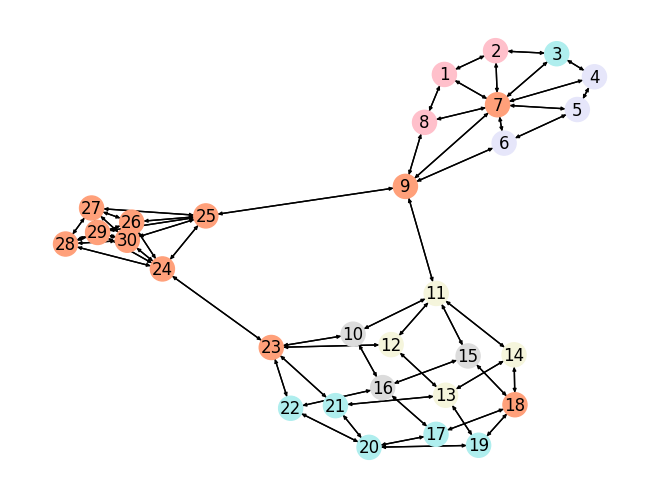

In [110]:
from sklearn.cluster import KMeans
X = v*l # X представляет особенности графика.
kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10)
kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
print(np.round(centroids,16))
labels = kmeans.labels_
print(labels)
error = kmeans.inertia_
colors = ('pink','lavender','lightsalmon', 'beige', 'paleturquoise', 'gainsboro')
node_colors = [colors[label] for label in labels]

G = nx.DiGraph(G_p1)


nx.draw(G, node_color=node_colors, with_labels=True,arrows=True, arrowsize=5)

plt.show()